# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [6]:
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [7]:
#mask = (train.dtypes == 'object').values

In [84]:
Train = train.fillna('')

In [85]:
Test = test.fillna('')

In [8]:
#Train = train[train.columns[mask]].fillna('')

In [9]:
#mask = (test.dtypes == 'object').values

In [10]:
#Test = test[test.columns[mask]].fillna('')

In [89]:
Train

,title,description,Category_name,Category,concat
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...
...,...,...,...,...,...
4234037,Мопед Дельта Мотоланд 70 кубиков,Продам новый мопед Дельта купленный 18 июня 20...,Мотоциклы и мототехника,14,Мопед Дельта Мотоланд 70 кубиков Продам новый ...
4234038,Xiaomi A2 4/64 почти новый (б/у 3 дня),"Xiaomi A2 версия 4/64. /\nВерсия полноценная, ...",Телефоны,84,Xiaomi A2 4/64 почти новый (б/у 3 дня) Xiaomi ...
4234039,Шерстяной комбинезон Joha,"В отличном состоянии. Мягкий, приятный к телу....",Детская одежда и обувь,29,Шерстяной комбинезон Joha В отличном состоянии...
4234040,Джинсы фирмы Zara р.152,Новые,Детская одежда и обувь,29,Джинсы фирмы Zara р.152 Новые


## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [87]:
Train['concat'] =Train['title']+' '+ Train['description']

In [ ]:
#мне не понравилось то что они склеиваются без пробела -- то есть вместо 2 слов на границе тайтла и дескрипшна получается одно кривое

In [88]:
Test['concat'] =Test['title']+' '+ Test['description']

In [ ]:
#наверное на досуге надо не дропать а лучше засунуть в отдельный столбец и сейм сделать с тестом
# ну да так и сделала

In [36]:
#Train.drop(columns = 'title', inplace = True)

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [90]:
len(set(Train['Category_name']))

50

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

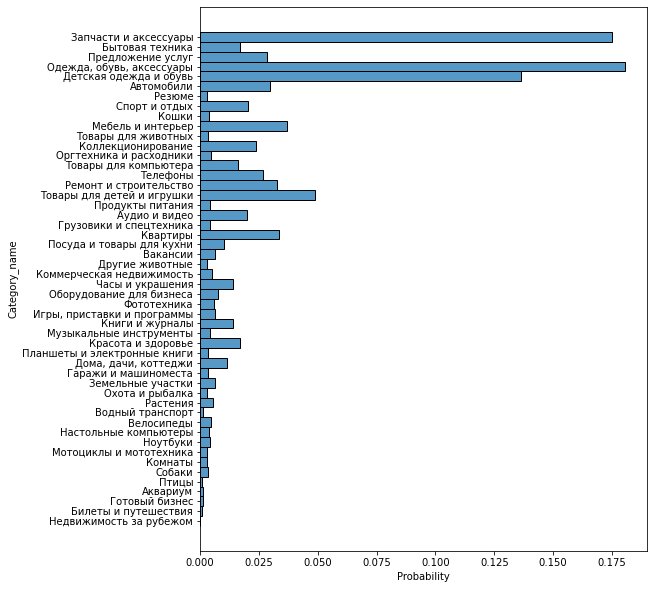

In [94]:
plt.figure(figsize=(8,10))
sns.histplot(Train, y="Category_name", stat="probability")
pass

In [95]:
probabilities = Train.groupby('Category_name').count()['concat']/Train.shape[0]

In [96]:
probabilities.nlargest(1)

Category_name
Одежда, обувь, аксессуары    0.180707
Name: concat, dtype: float64

In [97]:
probabilities.nsmallest(1)

Category_name
Недвижимость за рубежом    0.000039
Name: concat, dtype: float64

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
#я наконец додумалась до
Sample_Train = Train.sample(100000)

In [100]:
cnt_vec = CountVectorizer(ngram_range=(1, 1))
#нам же по сути ничего не нужно кроме конката
X = cnt_vec.fit_transform(Sample_Train['concat']) 

In [101]:
X.shape

(100000, 229666)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [102]:
keys = cnt_vec.vocabulary_.keys()

In [103]:
len([i for i in keys if i[:1].isdigit()])

33273

In [104]:
import string

In [105]:
len([i for i in keys if i[:1] in string.punctuation])

162

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [106]:
import nltk
from nltk.tokenize import NLTKWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
def custom_tokenizer(sample):
    stops = stopwords.words('russian')
    tokens = pd.Series(NLTKWordTokenizer().tokenize(sample.lower()))
    # ISALPHA ПРИДУМАЛА НЕ Я ПРИЗНАЮСЬ НО ЭТО Ж ГЕНИАЛЬНО
    ZIFER_NET=tokens[tokens.str.isalpha()]
    STOP_SLOV_NET = ZIFER_NET[~ZIFER_NET.isin(stops)]
    return [SnowballStemmer('russian').stem(w) for w in STOP_SLOV_NET]

In [108]:
sample = Train['concat'].iloc[0]

In [109]:
sample

'Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год Комплект ЭБУ (мозги, компьютер мотора, двигателя, коммутатор). Электронный блок управления двигателем (компьютер мотора) для Рено Kangoo (Канго Кангу), Меган, Сценик, Laguna (Лагуна), Clio (Клио), Nissan Micra (Ниссан Микра) и другие Рено Ниссан 1,5 дизель с топливной аппаратурой Делфи. Б.У. Оригинал, отличное состояние, проверенные с гарантией.\xa0/\n /\n\xa0............................................................................................./\n /\nНа все запчасти предоставляется\xa0ГАРАНТИЯ, возможна\xa0установка.\xa0Более подробно — в разделе «о компании». Мы дорожим своей репутацией и торгуем\xa0ТОЛЬКО ЛЕГАЛЬНЫМИ\xa0контрактными запчастями - на все детали в наличии таможенные документы. Все запчасти - от автомобилей\xa0БЕЗ ПРОБЕГА ПО РОССИИ.\xa0/\n /\n--- -------------------------------------------------------------------------------------------------/\n /\nОтправляем в другие регионы Таможенного Союза транспортной компание

In [110]:
custom_tokenizer(sample)

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'запчаст',
 'автомобил',
 'пробег',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [111]:
sample = Train.sample(500000)

In [112]:
sample

,title,description,Category_name,Category,concat
2360292,Детский самокат с сигналом,"Верный друг, легкий самокат. Сигал покупали от...",Товары для детей и игрушки,30,"Детский самокат с сигналом Верный друг, легкий..."
3074145,Запчасти на заказ,"Запчасти на заказ на ваш автомобиль, как ориги...",Запчасти и аксессуары,10,Запчасти на заказ Запчасти на заказ на ваш авт...
1764840,Браслет Pandora,"18 размер /\nПроба 925,серебро /\nПишите в лс",Часы и украшения,28,"Браслет Pandora 18 размер /\nПроба 925,серебро..."
447441,Молдинг решетки бампера левый правый Opel Astra J,Молдинг облицовка хром решетки бампера левый и...,Запчасти и аксессуары,10,Молдинг решетки бампера левый правый Opel Astr...
2311625,Свадебное платье,Продается атласное свадебное платье. После хим...,"Одежда, обувь, аксессуары",27,Свадебное платье Продается атласное свадебное ...
...,...,...,...,...,...
1014054,"Mazda BT-50, 2007",Один хозяин. В авариях и под залогом не была. ...,Автомобили,9,"Mazda BT-50, 2007 Один хозяин. В авариях и под..."
3590103,Киндер обмен разное,"Обмен, продажа. Звоните, пишите обсудим.",Коллекционирование,36,"Киндер обмен разное Обмен, продажа. Звоните, п..."
1351829,Толстовка,Толстовка для мальчика,Детская одежда и обувь,29,Толстовка Толстовка для мальчика
3628649,Дерево фикус бенджамина,"Продам большое красивое дерево, украсит Ваш до...",Растения,106,Дерево фикус бенджамина Продам большое красиво...


In [113]:
cnt_vec = CountVectorizer(ngram_range=(1, 1), tokenizer = custom_tokenizer)
to_tts = cnt_vec.fit_transform(sample['concat'])

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(to_tts, sample['Category'],test_size=0.2)

In [116]:
from sklearn.linear_model import SGDClassifier

In [117]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [118]:
from sklearn.metrics import accuracy_score 

In [121]:
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

0.85072

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
cnt_vec = TfidfVectorizer(ngram_range = (1, 1), tokenizer = custom_tokenizer)

In [125]:
to_tts = cnt_vec.fit_transform(sample['concat'])
X_train, X_test, y_train, y_test = train_test_split(to_tts,sample['Category'], test_size=0.2)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

0.82982

In [126]:
to_tts.shape

(500000, 182243)

In [127]:
cnt_vec = TfidfVectorizer(ngram_range = (1, 1), max_df = 0.9, tokenizer = custom_tokenizer)
to_tts = cnt_vec.fit_transform(sample['concat'])
X_train, X_test, y_train, y_test = train_test_split(to_tts,sample['Category'],test_size=0.2)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

0.82996

In [128]:
to_tts.shape

(500000, 182243)

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [129]:
from sklearn.feature_extraction.text import HashingVectorizer

In [130]:
cnt_vec = HashingVectorizer(ngram_range = (1, 1), n_features = 30000, tokenizer = custom_tokenizer)
to_tts = cnt_vec.fit_transform(sample['concat'])


C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


NameError: name 'x_test' is not defined

In [131]:
X_train, X_test, y_train, y_test = train_test_split(to_tts,sample['Category'],test_size=0.2)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

0.81015

самый высокий -- TfIdfVectorizer с  верхней границей равной 0.9, но вообще еще выше получилось с CountVectorizer. мб проблема с рандомной выборкой -- проверять это займет еще часов 5, я морально не готова

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

в общем скорее всего я не успею эту красоту кинуть до сегодняшней полуночи, но! дедлайн по посылке на кегль на день позже чем дедлайн посылки дз. вероятно, если я просрочу на день и то, и другое, общая просрочка тоже будет на день)) то есть, надеюсь, вы один балл снимете))